# Summarizing vectors

In [1]:
housing_prices <- read.csv("datasets/kc_house_data.csv")

In [2]:
head(housing_prices)

X,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [3]:
str(housing_prices)

'data.frame':	21613 obs. of  22 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965

In [5]:
summary(housing_prices)

       X               id                         date           price        
 Min.   :    1   Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000  
 1st Qu.: 5404   1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950  
 Median :10807   Median :3.905e+09   20140626T000000:  131   Median : 450000  
 Mean   :10807   Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088  
 3rd Qu.:16210   3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000  
 Max.   :21613   Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000  
                                     (Other)        :20833                    
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.

We have 21613 obs. of  21 variables. For this dataset, we can see various numeric and integer components in our multivariate data. Each line in the structure above is a vector component, therefore the vector structure is (id, data, price, bedrooms, etc).

Each variable has a different scale of values. Some range from 0 to 1 and some vary over long ranges. Bedrooms look interesting with a maximum valaue of 33. There could be possible outliers...which we'll look into shortly. 

For datasets such as this, we'd need to apply some cultural and domain understanding to the data. For instance, we see the zipcode is being treated as numerical value. However, we know that zipcodes are actually factors. 

## Univariate analysis

Let's plot histograms for all 18 variables and look into their distribution. 

gridExtra = This library helps you arrange multiple grid-based plots on a page and draw tables. We are plotting 18 different histograms and arranging them in a grid. 

ggplot2 = Used for data visualizations. It takes care of many of the fiddly details that make plotting a hassle

In [6]:
library(gridExtra)
library(ggplot2)

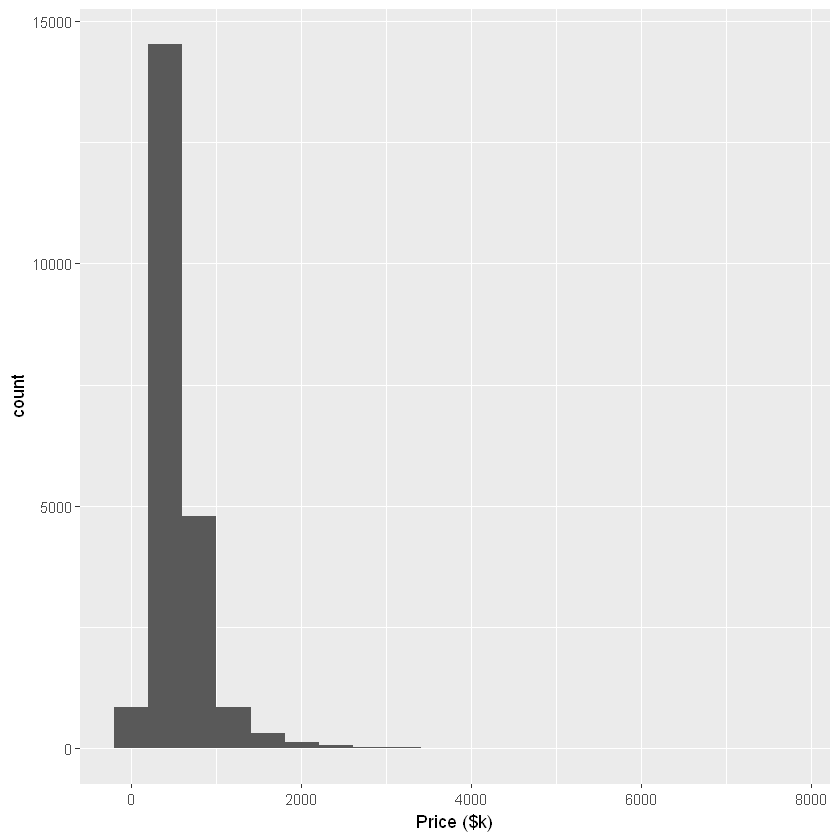

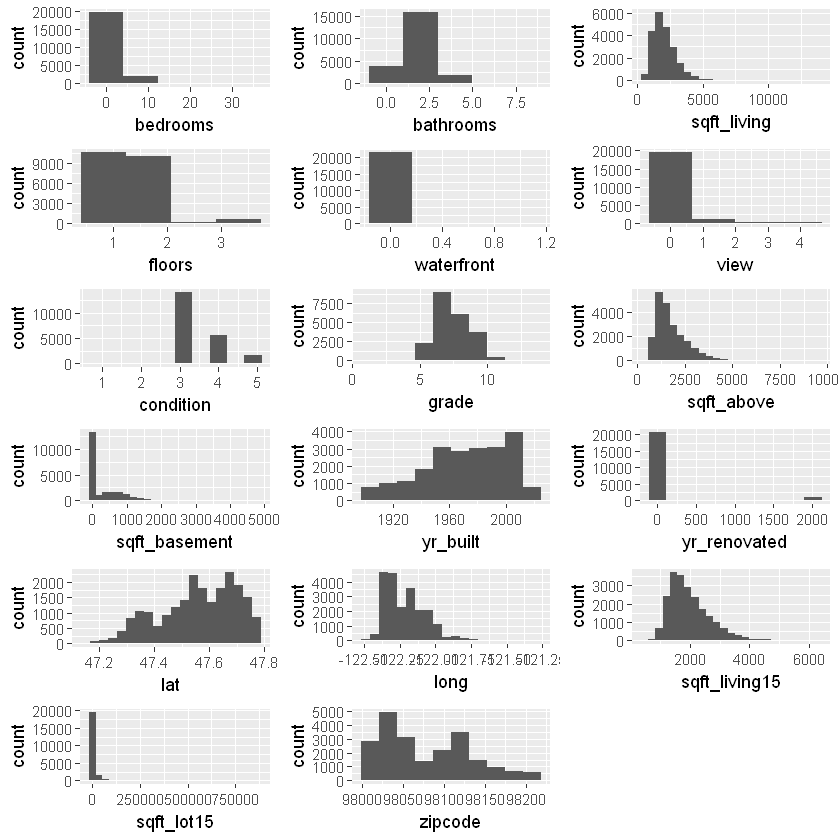

In [7]:
# dividing the price by 1000 to get the price in 1000 $. 
qplot(housing_prices$price/1000, bins = 20, xlab = "Price ($k)")

grid.arrange(
        qplot(housing_prices$bedrooms, bins = 5, xlab = "bedrooms"),
        qplot(housing_prices$bathrooms, bins = 5, xlab = "bathrooms"),
        qplot(housing_prices$sqft_living, bins = 25, xlab = "sqft_living"),
        qplot(housing_prices$floors,bins = 4,xlab='floors'),
        qplot(housing_prices$waterfront,bins = 4,xlab='waterfront'),
        qplot(housing_prices$view,bins = 4,xlab='view'),
        qplot(housing_prices$condition,bins = 10,xlab='condition'),
        qplot(housing_prices$grade,bins = 10,xlab='grade'),
        qplot(housing_prices$sqft_above,bins = 25,xlab='sqft_above'),
        qplot(housing_prices$sqft_basement,bins = 25,xlab='sqft_basement'),
        qplot(housing_prices$yr_built,bins = 10,xlab='yr_built'),
        qplot(housing_prices$yr_renovated,bins = 10,xlab='yr_renovated'),
        qplot(housing_prices$lat,bins = 20,xlab='lat'),
        qplot(housing_prices$long,bins = 20,xlab='long'),
        qplot(housing_prices$sqft_living15,bins = 25,xlab='sqft_living15'),
        qplot(housing_prices$sqft_lot15,bins = 25,xlab='sqft_lot15'),
        qplot(housing_prices$zipcode,bins = 10,xlab='zipcode'),
        ncol = 3
)

Now, let's look at a few of the plots to see the actual histograms as a table of values using the table function

In [8]:
table(housing_prices$bedrooms)


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 

In [9]:
table(housing_prices$bathrooms)


   0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 
  10    4   72 3852    9 1446 3048 1930 2047 5380 1185  753  589  731  155  136 
4.25  4.5 4.75    5 5.25  5.5 5.75    6 6.25  6.5 6.75  7.5 7.75    8 
  79  100   23   21   13   10    4    6    2    2    2    1    1    2 

In [10]:
table(housing_prices$floors)


    1   1.5     2   2.5     3   3.5 
10680  1910  8241   161   613     8 

In [11]:
table(housing_prices$view)


    0     1     2     3     4 
19489   332   963   510   319 

In [12]:
table(housing_prices$yr_renovated)


    0  1934  1940  1944  1945  1946  1948  1950  1951  1953  1954  1955  1956 
20699     1     2     1     3     2     1     2     1     3     1     3     3 
 1957  1958  1959  1960  1962  1963  1964  1965  1967  1968  1969  1970  1971 
    3     5     1     4     2     4     5     5     2     8     4     9     2 
 1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984 
    4     5     3     6     3     8     6    10    11     5    11    18    18 
 1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997 
   17    17    18    15    22    25    20    17    19    19    16    15    15 
 1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
   19    17    35    19    22    36    26    35    24    35    18    22    18 
 2011  2012  2013  2014  2015 
   13    11    37    91    16 

### Observations based on histograms

* Bedrooms: bedroom variable appears to have outliers but it could be a valid value

* Year renovated: not many houses are renovated. Most of the renovated houses are from the 90s/. 

We have to identify independent variables that are related to our response variable, "price". To do this, we will look for bivariate relationships. 

We know, culturally, that bedrooms will be a major decider in the price of a house. So, let's look at this and test our expectation with a scatterplot of the price and bedrooms. We will add a regression line to our scatterplot as well so we can estimate the correlation coefficient between the variables. 

In [ ]:
ggplot(housing_prices, aes(x = bedrooms, y = price / 1000)) + 
    xlab("Bedrooms") + 
    ylab("Price ($K)") + 
    geom_point() +
    geom_smooth(method = lm)